## LGM VIP Data Science
LGM VIP Data Science

July 2022

Beginnere Level Task 02 - Stock Market Prediction And Forecasting Using Stacked LSTM

Name - Saba Saeed

In [1]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [8]:
df1 = df.reset_index()['Close']

In [9]:
df1.shape

(2035,)

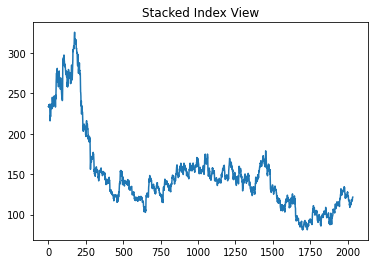

In [10]:
plt.plot(df1)
plt.title('Stacked Index View')
plt.show()

In [11]:
## Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [13]:
df1.shape

(2035, 1)

In [14]:
#splitting dataset into train and test split

training_size = int(len(df1)*0.65)
test_size = len(df1)- training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [15]:
training_size, test_size

(1322, 713)

In [16]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [18]:
print(X_train)

[[0.62418301 0.62214052 0.62622549 ... 0.83455882 0.86213235 0.85273693]
 [0.62214052 0.62622549 0.63378268 ... 0.86213235 0.85273693 0.87111928]
 [0.62622549 0.63378268 0.62234477 ... 0.85273693 0.87111928 0.84497549]
 ...
 [0.34517974 0.31781046 0.33047386 ... 0.2816585  0.27001634 0.26531863]
 [0.31781046 0.33047386 0.32128268 ... 0.27001634 0.26531863 0.27389706]
 [0.33047386 0.32128268 0.34007353 ... 0.26531863 0.27389706 0.25347222]]


In [19]:
X_train.shape, y_train.shape

((1221, 100), (1221,))

In [20]:
X_test.shape, y_test.shape

((612, 100), (612,))

In [21]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [22]:
## Creating Stacked LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 8s 214ms/step - loss: 0.0248 - val_loss: 0.0050
Epoch 2/100
20/20 [==============================] - 3s 143ms/step - loss: 0.0025 - val_loss: 0.0010
Epoch 3/100
20/20 [==============================] - 3s 151ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 4/100
20/20 [==============================] - 3s 165ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 5/100
20/20 [==============================] - 3s 174ms/step - loss: 0.0015 - val_loss: 9.8030e-04
Epoch 6/100
20/20 [==============================] - 3s 159ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 7/100
20/20 [==============================] - 3s 159ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/100
20/20 [==============================] - 3s 153ms/step - loss: 0.0013 - val_loss: 8.7184e-04
Epoch 9/100
20/20 [==============================] - 3s 147ms/step - loss: 0.0014 - val_loss: 8.6834e-04
Epoch 10/100
20/20 [==============================] - 3s 158ms/step - loss: 0.0

20/20 [==============================] - 3s 159ms/step - loss: 3.3852e-04 - val_loss: 3.6219e-04
Epoch 77/100
20/20 [==============================] - 3s 160ms/step - loss: 3.2362e-04 - val_loss: 3.2353e-04
Epoch 78/100
20/20 [==============================] - 3s 159ms/step - loss: 4.0445e-04 - val_loss: 3.8137e-04
Epoch 79/100
20/20 [==============================] - 3s 158ms/step - loss: 3.7271e-04 - val_loss: 3.0717e-04
Epoch 80/100
20/20 [==============================] - 3s 160ms/step - loss: 4.0221e-04 - val_loss: 3.8246e-04
Epoch 81/100
20/20 [==============================] - 3s 158ms/step - loss: 3.3335e-04 - val_loss: 3.4076e-04
Epoch 82/100
20/20 [==============================] - 3s 159ms/step - loss: 3.2624e-04 - val_loss: 3.2860e-04
Epoch 83/100
20/20 [==============================] - 3s 171ms/step - loss: 5.4669e-04 - val_loss: 4.0467e-04
Epoch 84/100
20/20 [==============================] - 3s 163ms/step - loss: 3.2303e-04 - val_loss: 3.0161e-04
Epoch 85/100
20/20 [===

In [25]:
import tensorflow as tf

In [26]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

20/20 [==============================] - 1s 31ms/step


In [27]:
## Transform to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [28]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train, train_predict))

165.71109394086383

In [29]:
math.sqrt(mean_squared_error(y_test, test_predict))

115.80714922311763

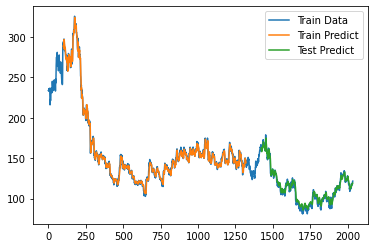

In [30]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label='Train Data')
plt.plot(trainPredictPlot, label='Train Predict')
plt.plot(testPredictPlot, label='Test Predict')
legend = plt.legend();
plt.show()